MSE pour la régression linéaire: 0.9177532469714291
MSE pour k-NN: 1.2033291315421477


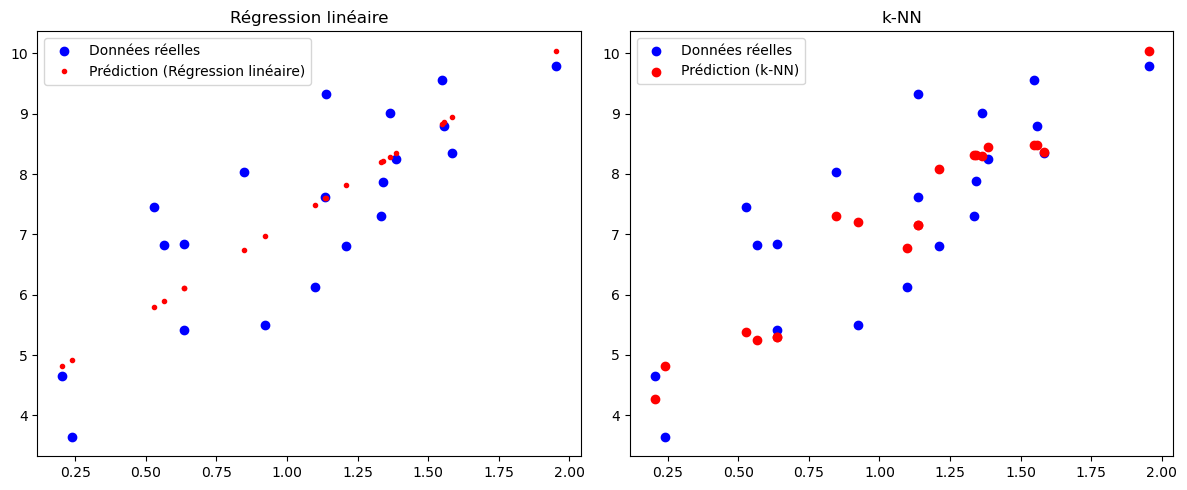

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Générer un ensemble de données artificiel
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 2. Diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Appliquer la régression linéaire par moindres carrés
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# 4. Appliquer la prédiction par k-plus proches voisins
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

# 5. Comparer les performances des deux méthodes
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"MSE pour la régression linéaire: {mse_lin}")
print(f"MSE pour k-NN: {mse_knn}")

# Visualisation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='b', label='Données réelles')
plt.plot(X_test, y_pred_lin, 'r.', label='Prédiction (Régression linéaire)')
plt.title('Régression linéaire')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='b', label='Données réelles')
plt.scatter(X_test, y_pred_knn, color='r', label='Prédiction (k-NN)')
plt.title('k-NN')
plt.legend()

plt.tight_layout()
plt.show()


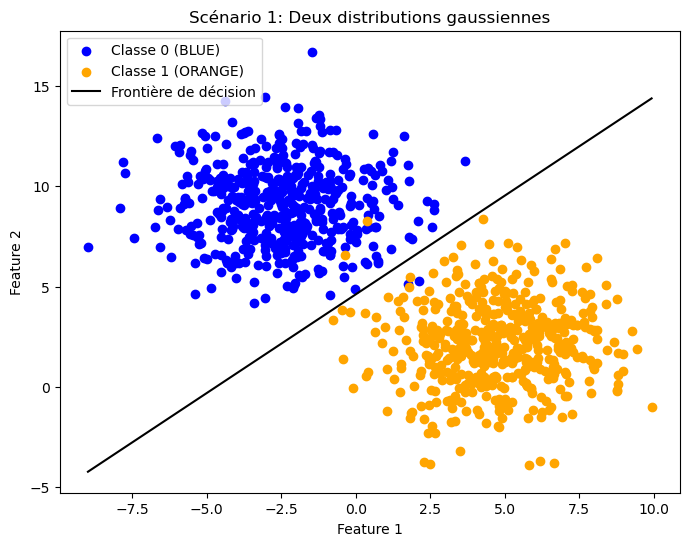

In [11]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# Générer des données pour le Scénario 1
X1, y1 = make_blobs(n_samples=1000, centers=2, random_state=42, cluster_std=2)

# Entraîner un modèle de régression logistique
log_reg1 = LogisticRegression()
log_reg1.fit(X1, y1)

# Obtenir les paramètres du modèle pour la frontière de décision
coef1 = log_reg1.coef_
intercept1 = log_reg1.intercept_

# Calculer la frontière de décision
x_values1 = np.linspace(X1[:, 0].min(), X1[:, 0].max(), 400)
y_values1 = -(coef1[0][0] * x_values1 + intercept1) / coef1[0][1]

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X1[y1 == 0][:, 0], X1[y1 == 0][:, 1], color='blue', label='Classe 0 (BLUE)')
plt.scatter(X1[y1 == 1][:, 0], X1[y1 == 1][:, 1], color='orange', label='Classe 1 (ORANGE)')
plt.plot(x_values1, y_values1, '-k', label='Frontière de décision')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Scénario 1: Deux distributions gaussiennes')
plt.show()


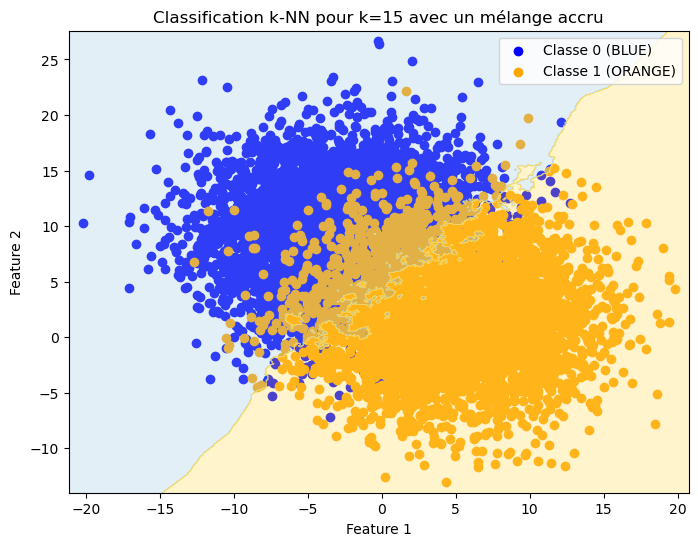

In [19]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import ListedColormap

# Générer des données avec un écart-type plus grand pour augmenter le mélange
X1, y1 = make_blobs(n_samples=10000, centers=2, random_state=42, cluster_std=4.5)  # cluster_std augmenté à 4.5

def kNN_predict(X_train, y_train, x, k=15):
    """Fonction pour prédire la classe d'un point en utilisant la méthode k-NN."""
    distances = np.linalg.norm(X_train - x, axis=1)
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train[k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X1[y1 == 0][:, 0], X1[y1 == 0][:, 1], color='blue', label='Classe 0 (BLUE)')
plt.scatter(X1[y1 == 1][:, 0], X1[y1 == 1][:, 1], color='orange', label='Classe 1 (ORANGE)')

# Définir les limites pour tracer la frontière de décision
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

# Créer une grille de points pour visualiser les régions de classification
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Obtenir les prédictions pour chaque point de la grille
Z = np.array([kNN_predict(X1, y1, np.array([xi, yi])) for xi, yi in zip(np.ravel(xx), np.ravel(yy))])
Z = Z.reshape(xx.shape)

# Afficher les régions de classification
cmap_background = ListedColormap(['#A0CBE2', '#FFDB58'])
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Classification k-NN pour k=15 avec un mélange accru')
plt.show()


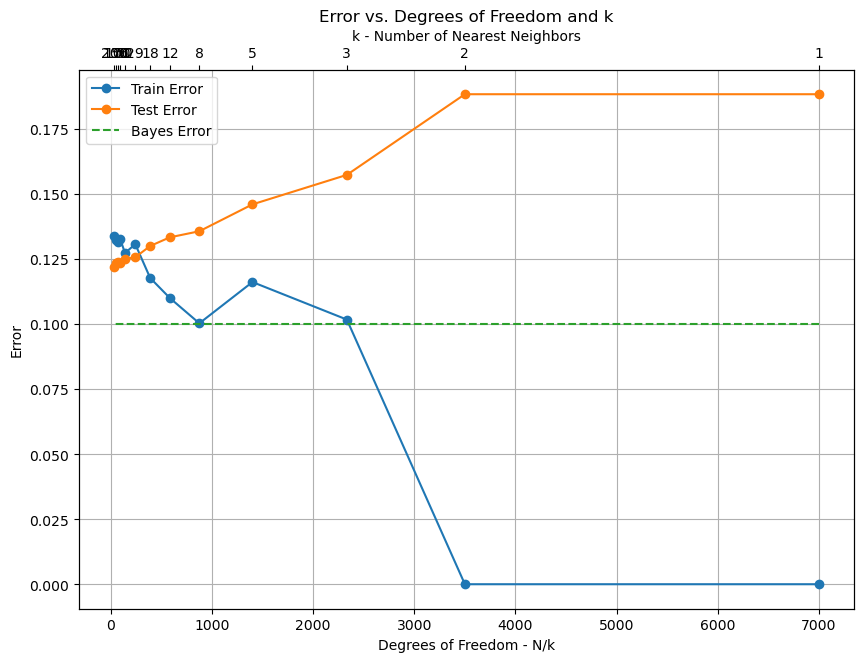

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Liste des valeurs de k à explorer
k_values = [1, 2, 3, 5, 8, 12, 18, 29, 50, 75, 100, 150, 200]

# Stocker les erreurs pour chaque valeur de k
train_errors = []
test_errors = []
degrees_of_freedom = [len(X_train) / k for k in k_values]

# Calculer les erreurs pour chaque valeur de k
for k in k_values:
    # Prédire les classes en utilisant k-NN
    y_train_pred = [kNN_predict(X_train, y_train, x, k) for x in X_train]
    y_test_pred = [kNN_predict(X_train, y_train, x, k) for x in X_test]
    
    # Calculer les erreurs
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Supposer un taux d'erreur de Bayes fixe
bayes_error = [0.1] * len(k_values)

# Créer une figure et un axe
fig, ax1 = plt.figure(figsize=(10, 7)), plt.gca()

# Tracer l'erreur en fonction des degrés de liberté sur l'axe principal
ax1.plot(degrees_of_freedom, train_errors, label="Train Error", marker='o')
ax1.plot(degrees_of_freedom, test_errors, label="Test Error", marker='o')
ax1.plot(degrees_of_freedom, bayes_error, label="Bayes Error", linestyle='--')
ax1.set_xlabel("Degrees of Freedom - N/k")
ax1.set_ylabel("Error")
ax1.legend(loc="upper left")
ax1.grid(True)

# Ajouter un second axe pour k - nombre de voisins les plus proches
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(degrees_of_freedom)
ax2.set_xticklabels(k_values)
ax2.set_xlabel("k - Number of Nearest Neighbors")

# Titre et affichage
plt.title("Error vs. Degrees of Freedom and k")
plt.show()



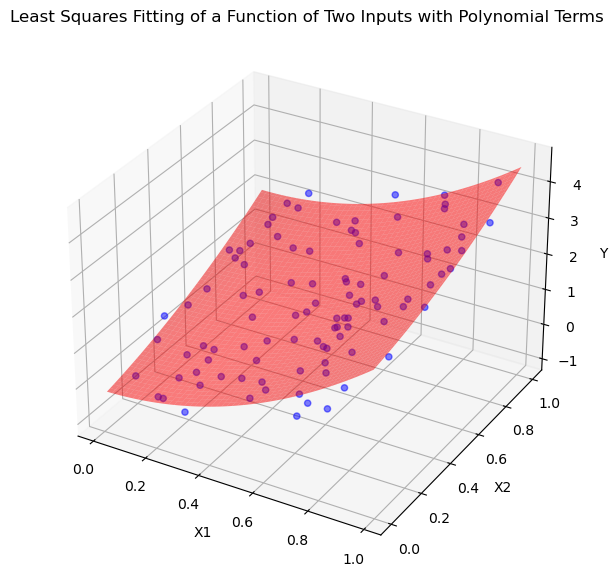

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

# 1. Générer un ensemble de données bidimensionnelles
np.random.seed(0)
X = np.random.rand(100, 2)
Y = 3*X[:, 0]**2 + 2*X[:, 1]**2 + np.random.randn(100)*0.5  # Surface quadratique avec un peu de bruit

# Ajouter des termes polynomiaux à X
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 2. Appliquer une régression linéaire avec des termes polynomiaux
reg = LinearRegression().fit(X_poly, Y)

# Prédictions pour la surface ajustée
x_surf = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_surf = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_surf = np.column_stack((x_surf.ravel(), y_surf.ravel()))
X_surf_poly = poly.transform(X_surf)
z_surf = reg.predict(X_surf_poly).reshape(x_surf.shape)

# 3. Visualiser les données et la surface ajustée en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='b', marker='o', alpha=0.5, label='Data points')
ax.plot_surface(x_surf, y_surf, z_surf, color='r', alpha=0.5, label='Least squares fit')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Least Squares Fitting of a Function of Two Inputs with Polynomial Terms')
plt.show()


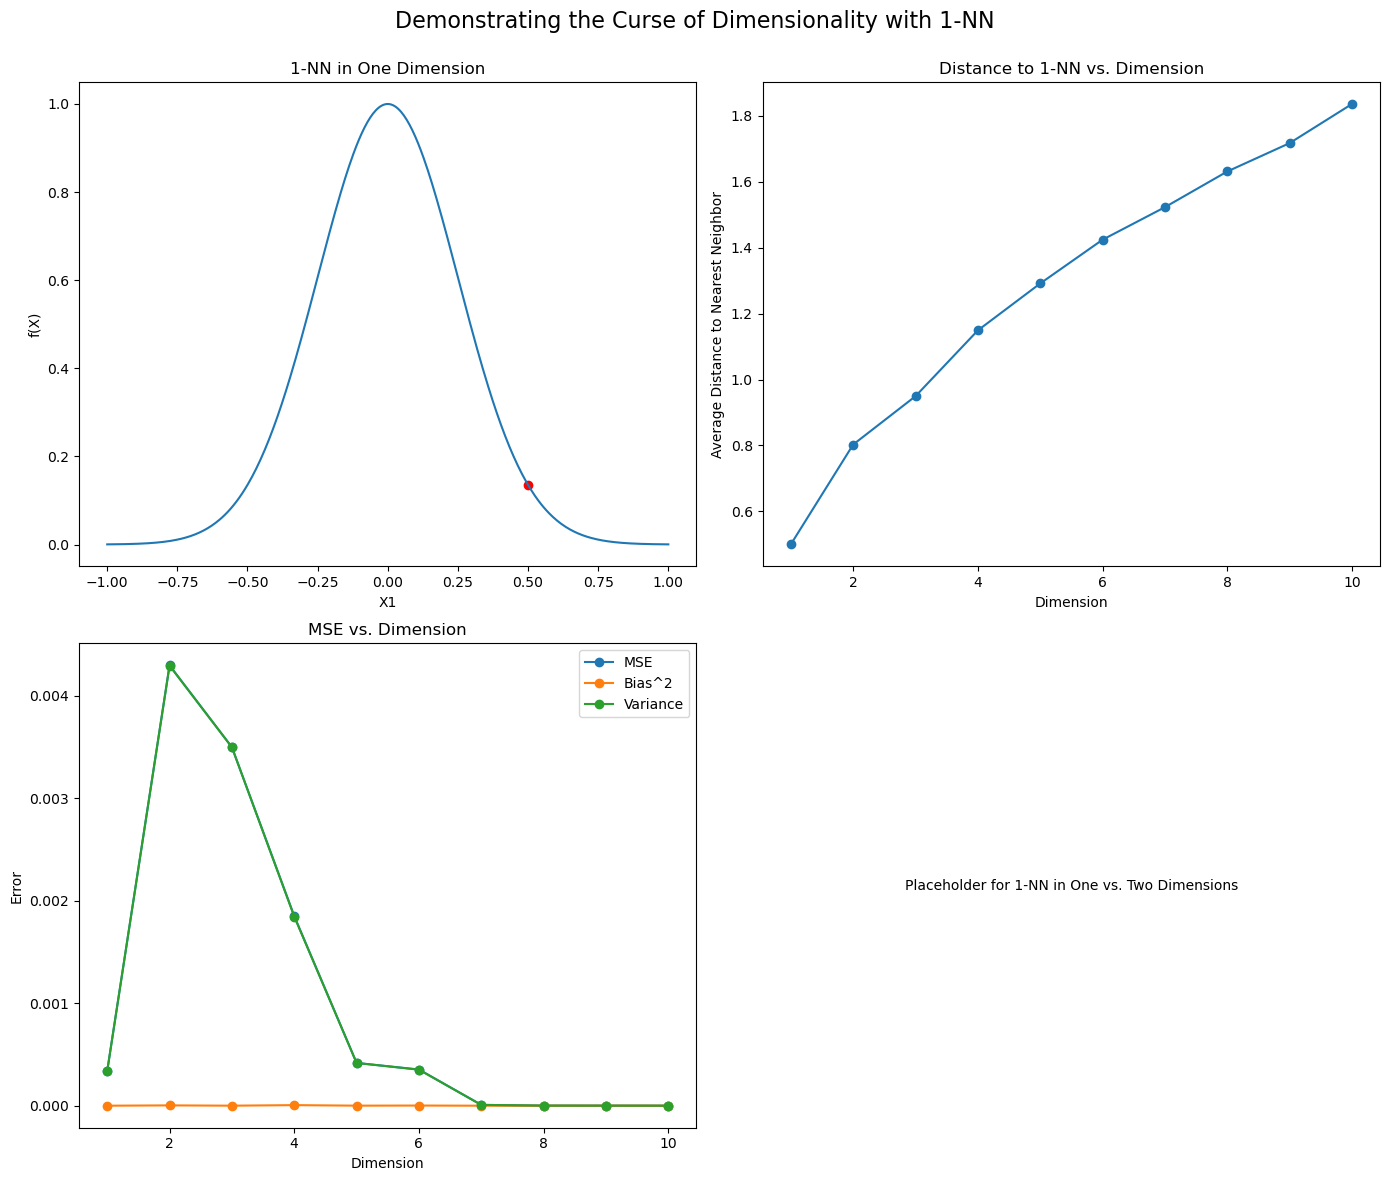

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target function
def f(X):
    return np.exp(-8 * np.linalg.norm(X, axis=1)**2)

# Generate data for the plots
np.random.seed(0)
dimensions = list(range(1, 11))
nn_distances = []
mse_values = []
variance_values = []
bias_values = []

for p in dimensions:
    X_train = np.random.uniform(-1, 1, (100, p))
    y_train = f(X_train)
    
    X_test = np.random.uniform(-1, 1, (1000, p))
    y_test = f(X_test)
    
    # Compute 1-NN predictions
    y_pred = []
    for x in X_test:
        distances = np.linalg.norm(X_train - x, axis=1)
        y_pred.append(y_train[np.argmin(distances)])
    
    # Calculate distance to 1-NN for each point in training set from the origin
    distances_to_origin = np.linalg.norm(X_train, axis=1)
    nn_distances.append(np.mean(distances_to_origin))
    
    # Calculate MSE, Variance, and Bias^2
    mse = np.mean((y_test - y_pred)**2)
    mse_values.append(mse)
    
    bias_sq = (np.mean(y_pred) - np.mean(y_test))**2
    bias_values.append(bias_sq)
    
    variance = mse - bias_sq
    variance_values.append(variance)

# Let's try plotting the figures again

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Demonstrating the Curse of Dimensionality with 1-NN", fontsize=16)

# 1-NN in One Dimension
x = np.linspace(-1, 1, 400).reshape(-1, 1)
y = f(x)
axes[0, 0].plot(x, y, label="Target Function")
axes[0, 0].scatter([0.5], [f(np.array([[0.5]]))], color='red', marker='o')
axes[0, 0].set_title("1-NN in One Dimension")
axes[0, 0].set_xlabel("X1")
axes[0, 0].set_ylabel("f(X)")

# Distance to 1-NN vs. Dimension
axes[0, 1].plot(dimensions, nn_distances, marker='o', label="Average Distance to 1-NN")
axes[0, 1].set_title("Distance to 1-NN vs. Dimension")
axes[0, 1].set_xlabel("Dimension")
axes[0, 1].set_ylabel("Average Distance to Nearest Neighbor")

# MSE vs. Dimension
axes[1, 0].plot(dimensions, mse_values, marker='o', label="MSE")
axes[1, 0].plot(dimensions, bias_values, marker='o', label="Bias^2")
axes[1, 0].plot(dimensions, variance_values, marker='o', label="Variance")
axes[1, 0].set_title("MSE vs. Dimension")
axes[1, 0].set_xlabel("Dimension")
axes[1, 0].set_ylabel("Error")
axes[1, 0].legend()

# Placeholder for the missing plot (1-NN in One vs. Two Dimensions)
axes[1, 1].text(0.5, 0.5, 'Placeholder for 1-NN in One vs. Two Dimensions', 
               ha='center', va='center', transform=axes[1, 1].transAxes)
axes[1, 1].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
